## Linear Regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # column vector
y = 4 + 3 * X + np.random.randn(100, 1)  # column vector

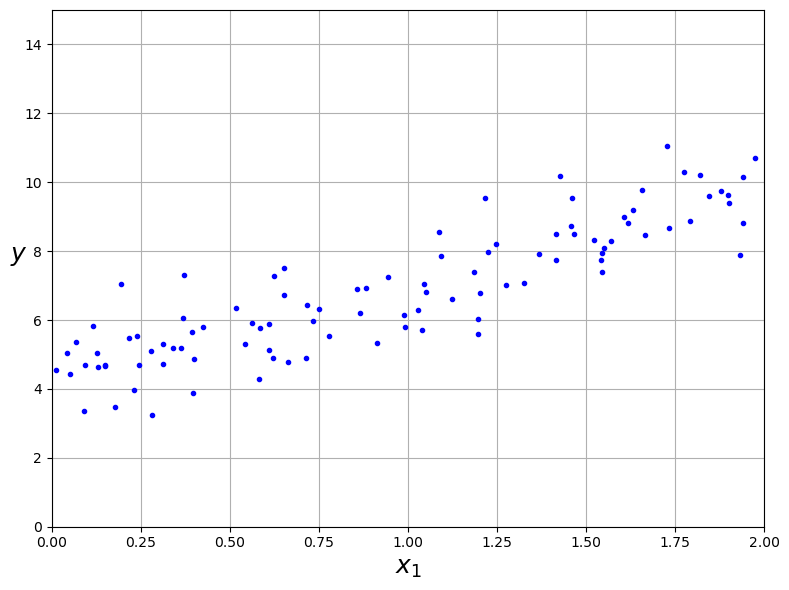

In [9]:
plt.figure(figsize=(8,6))
plt.plot(X, y, "b." )
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([0,2,0,15])
plt.grid()
save_fig("Generated_data_plot")
plt.show()


In [10]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y

In [11]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b@ theta_best
y_predict


array([[4.21509616],
       [9.75532293]])

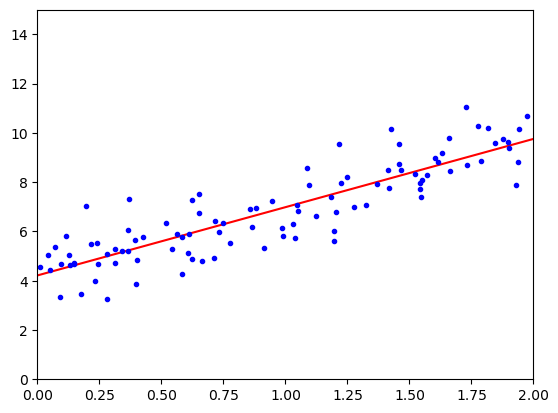

In [13]:
plt.plot(X_new, y_predict,"r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## Logistic Regression

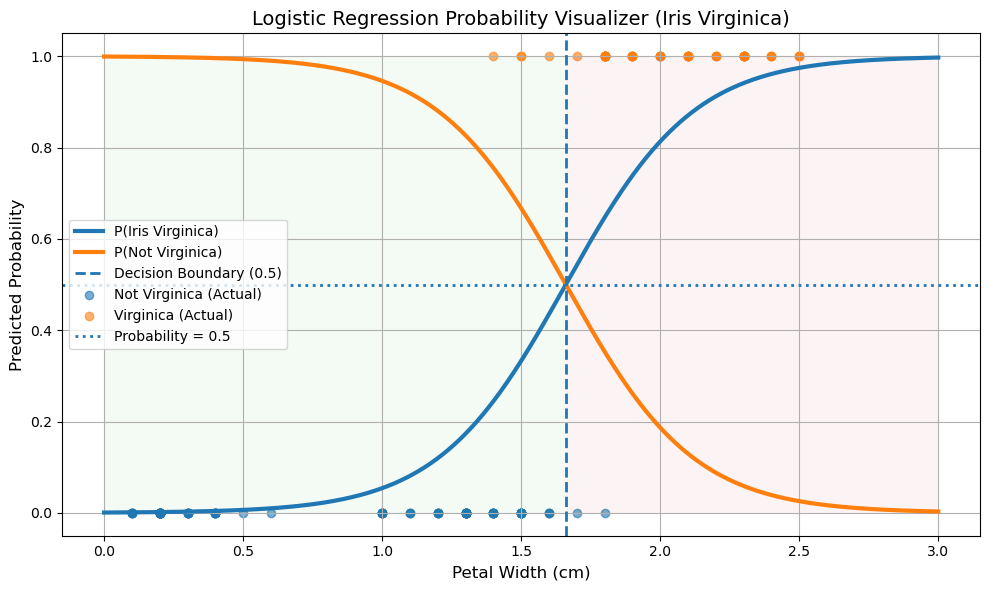

In [28]:
### import numpy as np
import matplotlib.pyplot as plt

# 1. Generate smooth input range
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# 2. Predict probabilities
y_proba = log_reg.predict_proba(X_new)

# 3. Plot probability curves
plt.figure(figsize=(10, 6))
plt.plot(X_new, y_proba[:, 1], label="P(Iris Virginica)", linewidth=3)
plt.plot(X_new, y_proba[:, 0], label="P(Not Virginica)", linewidth=3)

# 4. Decision boundary at P = 0.5
decision_boundary = X_new[np.argmax(y_proba[:, 1] >= 0.5)]
plt.axvline(decision_boundary, linestyle="--", linewidth=2, label="Decision Boundary (0.5)")

# 5. Plot actual training points
plt.scatter(X[y == 0], y[y == 0], label="Not Virginica (Actual)", alpha=0.6)
plt.scatter(X[y == 1], y[y == 1], label="Virginica (Actual)", alpha=0.6)

# 6. Threshold line
plt.axhline(0.5, linestyle=":", linewidth=2, label="Probability = 0.5")

# 7. Region shading
plt.fill_between(X_new.ravel(), 0, 1, where=(X_new.ravel() < decision_boundary),
                  alpha=0.05)
plt.fill_between(X_new.ravel(), 0, 1, where=(X_new.ravel() >= decision_boundary),
                  alpha=0.05)

# 8. Labels & title
plt.xlabel("Petal Width (cm)", fontsize=12)
plt.ylabel("Predicted Probability", fontsize=12)
plt.title("Logistic Regression Probability Visualizer (Iris Virginica)", fontsize=14)

# 9. Legend & grid
plt.legend(loc="center left")
plt.grid(True)
plt.tight_layout()
plt.show()
